# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Наш план на это исследование:
Изучить поверхностно данные

Сделать предобработку данных

Добавить в таблицу новые столбцы для дальнейшего анализа

Найти факторы, влиящие на окончательную стоимость объекта

Сделать вывод о том, как настроить автоматическую проверку для определения 'реальных' объявлений.

### Откройте файл с данными и изучите общую информацию. 

**Импортируем библиотеку pandas. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data.** 

In [645]:
import pandas as pd

In [646]:
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

**Выведем первые 20 строчек таблицы для ознакомления.**

In [647]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем основную информацию о датафрейме с помощью метода `info()`.**

In [648]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Выведем основную информацию о датафрейме с помощью метода `describe()`.**

In [649]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Построим гистограмы для всех столбцов таблицы для всех столбцов таблицы.**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

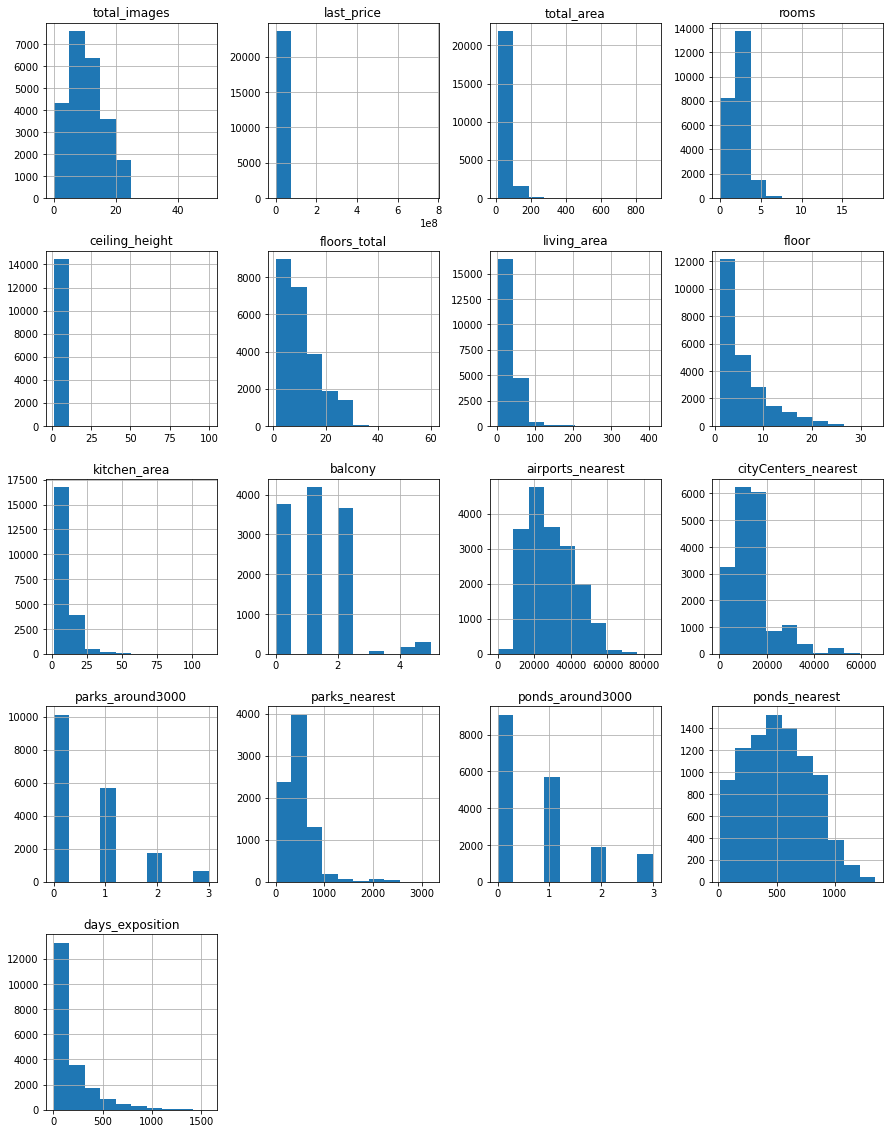

In [650]:
data.hist(figsize=(15, 20))

**Мы поверхностно изучили данные, но уже смогли оценить наши данные, и они неидеальны, в них есть как пропуски, так и аномальные значения. Займемся исправлением этого в следующих главах.**


### Предобработка данных

**Выведем количество пропущенных значений для каждого столбца.**

In [651]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропусков в таблице довольно много, из важных критериев много пропусков в столбцах: ceiling_height,living_area,kitchen_area,balcony. Также большое количество пропусков, определяющих геолокацию и близость инфраструктуры объекта.**

**Я считаю, что из всех пропусков в этой таблице можно заполнить только один столбец 'balcony' на значение 0, так как если балкона нет, то о их количестве могли просто оставить пропуск**

In [652]:
data['balcony']=data['balcony'].fillna(0)

**Проверим теперь на пропуски в этом столбце.**

In [653]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Нам удалось заполнить пропуски в довольно важном столбце для анализа стоимости квартир.**

**Теперь взглянем еще раз на информацию о таблице, чтобы изменить тип данных в некоторых столбцах.**

In [654]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Заметим, стобцы: first_day_exposition,is_apartment имеют не тот тип данных, в котором они должны быть представлены для дальнейшего анализа.**

**Изменим это.**

In [655]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [656]:
data['is_apartment'] = data['is_apartment'].astype('boolean')

In [657]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Далее я хочу найти неявные дубликаты в населенных пунктах.**

In [658]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [659]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [660]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [661]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

In [662]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции','поселок')

In [663]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок','поселок')

In [664]:
data['locality_name'] = data['locality_name'].str.replace('поселок имени','поселок')

In [665]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

**Мы провели чистку на неявные дубликаты.**

**Посмотрим еще раз на общую информацию о датасете, для нахождения аномальных значений в некоторых столбцах.**

In [666]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Высота потолков выглядит слишком неправдоподобно, вероятно, люди вместо 25м, хотели указать 2,5м. Исправим:** 

In [667]:
data.loc[data['ceiling_height'] >15, 'ceiling_height'] = data['ceiling_height']/10

In [668]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.729608,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.319850,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Отлично, теперь максимальная высота потолков 14м, это больше похоже на правду**

In [669]:
data = data.query('total_area>(living_area+kitchen_area)' )

### Посчитайте и добавьте в таблицу новые столбцы

**После предобработки данных, для анализа нам также понадобятся новые столбцы, такие как:цена одного квадратного метра,
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее),
месяц публикации объявления,
год публикации объявления,
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах.**

***цена за квадратный метр:***

In [670]:
data['price_for_m']=data['last_price']/data['living_area']

***день недели продажи:***

In [671]:
data['weekday'] = data['first_day_exposition'].dt.weekday

***месяц продажи:***

In [672]:
data['month'] = data['first_day_exposition'].dt.strftime('%m')

***год продажи:***

In [673]:
data['year'] = data['first_day_exposition'].dt.strftime('%Y')


***тип этажа:***

In [674]:
import numpy as np

def floor_cat(floor, floors_total):
    return np.where(floor==floors_total, "последний", np.where(floor==1, "первый", "другой"))

In [675]:
data["floor_cat"] = floor_cat(data["floor"], data["floors_total"])

***расстояние до центра в км:***

In [676]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

**Посмотрим еще раз на нашу таблицу.**

In [677]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month,year,floor_cat,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,<NA>,...,482.0,2.0,755.0,NaN,254901.960784,3,03,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,<NA>,...,NaN,0.0,NaN,81.0,180107.526882,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,<NA>,...,90.0,2.0,574.0,558.0,151486.880466,3,08,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,<NA>,...,112.0,1.0,48.0,121.0,312500.000000,1,06,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,<NA>,...,NaN,NaN,NaN,55.0,200694.444444,0,09,2018,другой,NaN


**Отлично, теперь таблица готова к анализу и выдвижению гипотез.**

### Проведите исследовательский анализ данных

**Для исследования потребуется наглядная картина каждого критерия.**

**Используя данные гистограммы, проведем чистку от аномальных значений в некоторых столбцах:**

Изучим следующие параметры объектов:
1) общая площадь;

2) жилая площадь;

3) площадь кухни;

4) цена объекта;

5) количество комнат;

6) высота потолков;

7) этаж квартиры;

8) тип этажа квартиры («первый», «последний», «другой»);

9) общее количество этажей в доме;

10) расстояние до центра города в метрах;

11) расстояние до ближайшего аэропорта;

12) расстояние до ближайшего парка;

13) день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

**Общая площадь квартир.**

<AxesSubplot:>

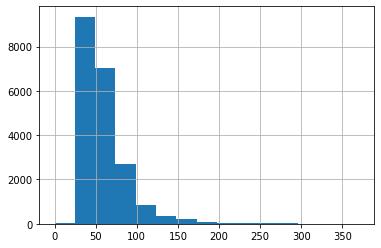

In [678]:
data['total_area'].hist(bins=15,range=(0,370))

In [679]:
data = data.query('10 <= total_area <= 170')

**Жилая площадь квартир.**

<AxesSubplot:>

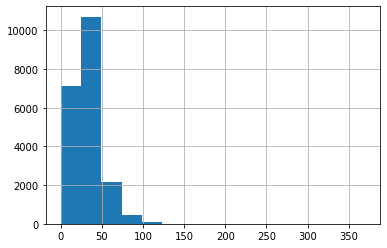

In [680]:
data['living_area'].hist(bins=15,range=(0,370))

In [681]:
data = data.query('15 <= living_area <= 120')

**Проверим, очистились ли редкие аномальные значения или нет.**

<AxesSubplot:>

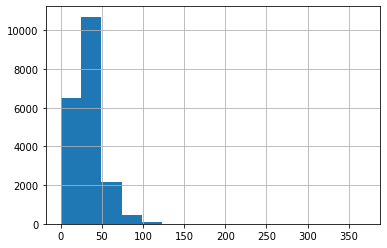

In [682]:
data['living_area'].hist(bins=15,range=(0,370))

**Да, теперь проведем ту же операцию для остальных столбцов таблицы.**

**Кухонная площадь квартир.**

<AxesSubplot:>

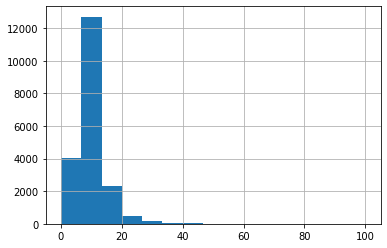

In [683]:
data['kitchen_area'].hist(bins=15,range=(0,100))

In [684]:
data = data.query('5 <= kitchen_area <= 50')

**Цена квартир.**

<AxesSubplot:>

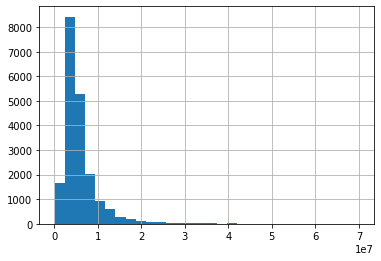

In [685]:
data['last_price'].hist(bins=30,range=(100000,70000000))

In [686]:
data = data.query('10000 <= last_price <= 10000000')

**Количество комнат.**

<AxesSubplot:>

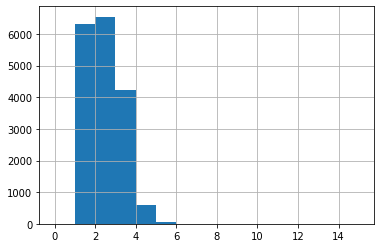

In [687]:
data['rooms'].hist(bins=15,range=(0,15))

In [688]:
data = data.query('1 <= rooms <= 8')

**Высота потолков.**

<AxesSubplot:>

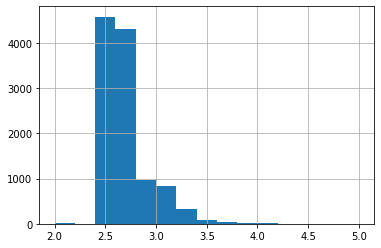

In [689]:
data['ceiling_height'].hist(bins=15,range=(2,5))

**Этажи квартир.**

<AxesSubplot:>

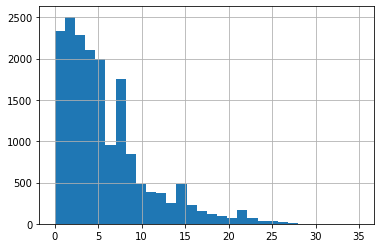

In [690]:
data['floor'].hist(bins=30,range=(0,35))

**Категории этажей в квартирах.**

<AxesSubplot:>

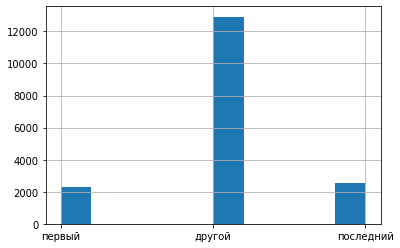

In [691]:
data['floor_cat'].hist()

**Этажность домой.**

<AxesSubplot:>

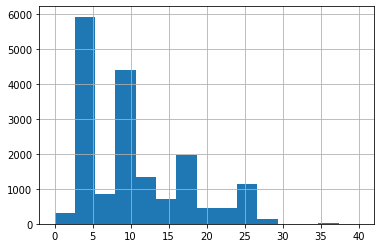

In [692]:
data['floors_total'].hist(bins=15,range=(0,40))

**Расстояние до центра.**

<AxesSubplot:>

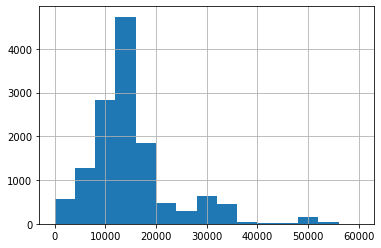

In [693]:
data['cityCenters_nearest'].hist(bins=15,range=(0,60000))

**Расстояние до аэропорта.**

<AxesSubplot:>

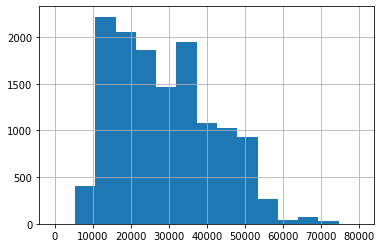

In [694]:
data['airports_nearest'].hist(bins=15,range=(0,80000))

**Расстояние до парка.**

<AxesSubplot:>

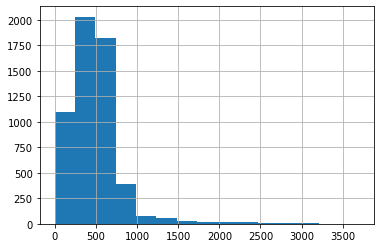

In [695]:
data['parks_nearest'].hist(bins=15,range=(0,3700))

**Продажи по дням недели.**

<AxesSubplot:>

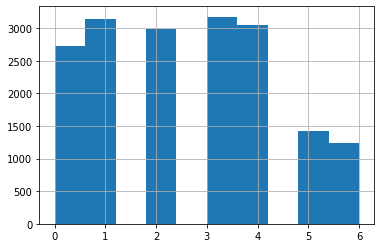

In [696]:
data['weekday'].hist()

**Продажи по месяцам.**

<AxesSubplot:>

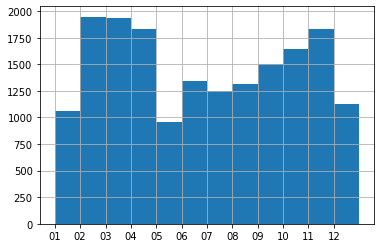

In [697]:
data['month'].sort_values().hist(bins=12,range=(0,12))

**Продажи по годам.**

<AxesSubplot:>

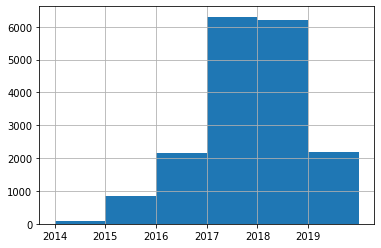

In [698]:
data['year'].sort_values().hist(bins=6,range=(0,6))

**На первый взгляд видно, что графики показателей площадей, высоты потолков и  цены имеют похожие гистограммы по распределению, также по последним графикам можно заметить, что в количество продаж в выходные проседает, однако с каждым годом продаж все больше и больше.**

**Одним из ключевым вопросом в продажах квартир является то, на сколько быстро была она продана.** 

<AxesSubplot:>

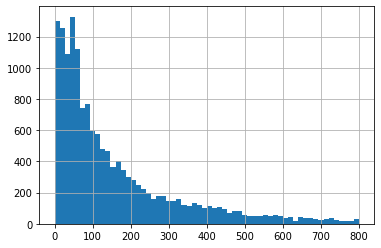

In [699]:
data['days_exposition'].hist(bins=60,range=(0,800))

**Найдем среднее время продажи.**

In [700]:
data['days_exposition'].mean()

176.72181128191934

**Найдем медианное время продажи.**

In [701]:
data['days_exposition'].median()

97.0

**Глядя на график, среднее и медианное время продаж, можно сделать вывод, что в среднем продажи проходят за 3 месяца, к быстрым продажам можно относить те, которые проводятся в течении месяца-двух, а те квартиры, что стоят уже почти полгода и более, я бы относил к долгим продажам.**

Теперь займемся исследованием факторов, короторые влияют на полную стоимость квартиры

Создадим из нашей таблицы новую, которая будет иметь только часть столбцов от исходной, такие как:

общая площадь;

жилая площадь;

площадь кухни;

количество комнат;

удаленность от центра;

цена.

In [702]:
new_data = data[['total_area','living_area','kitchen_area','rooms','cityCenters_nearest','last_price']]

In [703]:
new_data

,total_area,living_area,kitchen_area,rooms,cityCenters_nearest,last_price
1,40.40,18.60,11.00,1,18603.0,3350000.0
2,56.00,34.30,8.30,2,13933.0,5196000.0
4,100.00,32.00,41.00,2,8098.0,10000000.0
8,33.16,15.43,8.81,1,NaN,2900000.0
9,61.00,43.60,6.50,3,15008.0,5400000.0
...,...,...,...,...,...,...
23691,72.90,40.30,10.60,2,4489.0,9470000.0
23692,30.00,17.50,6.00,1,NaN,1350000.0
23693,62.40,40.00,8.00,3,34104.0,4600000.0
23694,133.81,73.30,13.83,3,4232.0,9700000.0


Построим матрицу диаграмм рассеяния, которые покажут зависимость цены от указанных выше параметров.


array([[<AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='living_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='living_area'>],
       [<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='kitchen_area'>,
        <

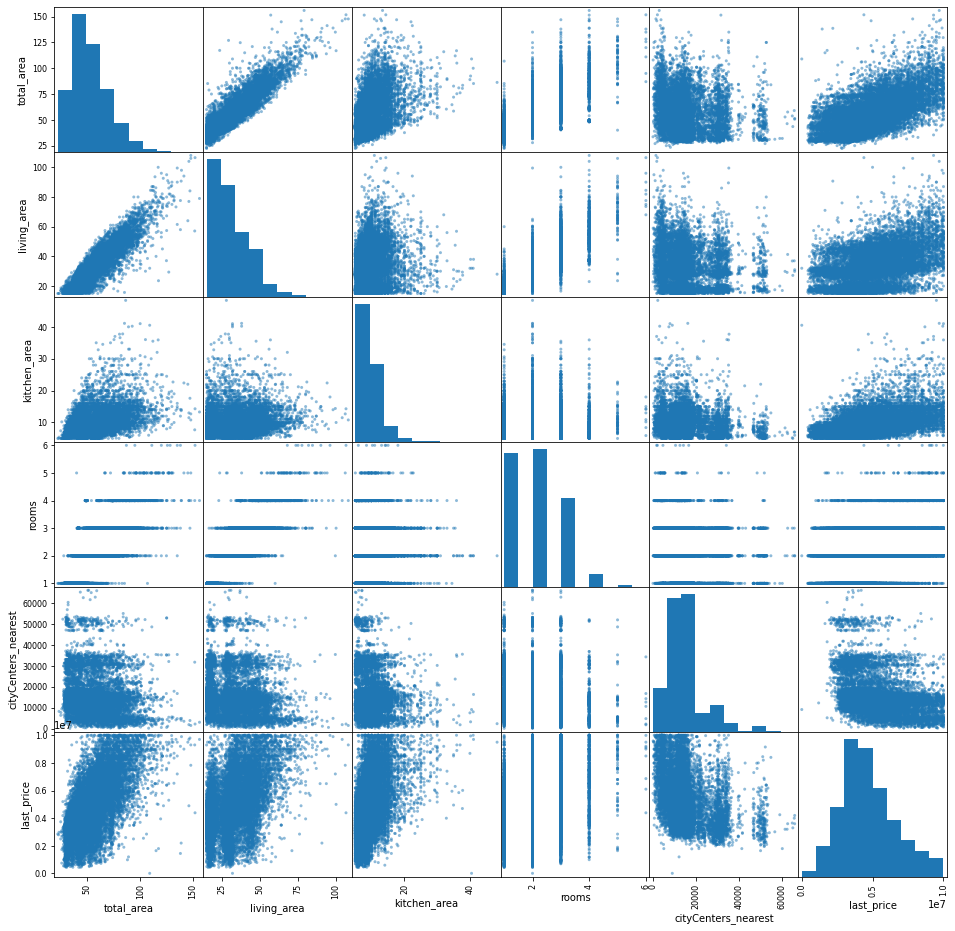

In [704]:
pd.plotting.scatter_matrix(new_data, figsize=(16, 16)) 

**В последней строке находится диаграмма рассеивания цены к остальным критериям.**

**Посчитаем коэффициент корреляции.**

In [705]:
new_data.corr()

,total_area,living_area,kitchen_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.914030,0.428683,0.800883,-0.100685,0.661080
living_area,0.914030,1.000000,0.135280,0.902840,-0.089640,0.539531
kitchen_area,0.428683,0.135280,1.000000,0.024047,-0.095056,0.464115
rooms,0.800883,0.902840,0.024047,1.000000,-0.064254,0.425627
cityCenters_nearest,-0.100685,-0.089640,-0.095056,-0.064254,1.000000,-0.341560
last_price,0.661080,0.539531,0.464115,0.425627,-0.341560,1.000000


**Построим тепловую карту, которая использует теплые оттенки в тех пересечениях, где сильнее корреляция.**

<AxesSubplot:>

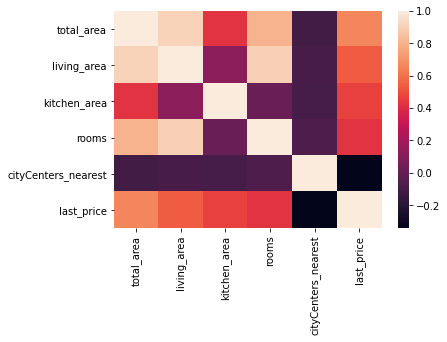

In [706]:
import seaborn
seaborn.heatmap(new_data.corr())


**Наибольшее значение корреляции к цене заметно у общей площади квартиры, а так же ее производной(площадь кухни и жилой площади). Наименьшее влияние к стоимости оказывает удаленность от центра, но это может быть вызвано элитными коттеджами загородом.**

**Посмотрим на цену с помощью тех параметров, которые нелинейно влияют на стоимость объекта.**

**Влияние этажа на среднюю стоимость квартиры.**

<AxesSubplot:xlabel='floor_cat', ylabel='last_price'>

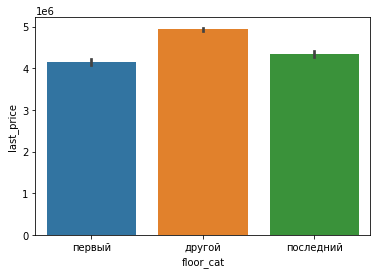

In [707]:
seaborn.barplot(data=data, x="floor_cat", y="last_price")

**Можно заметить, что первые и последние этажи в среднем дешевле других.**

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

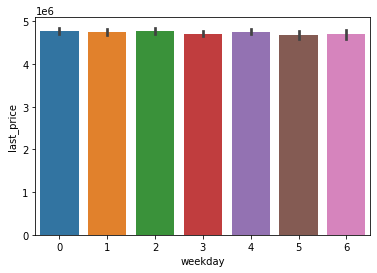

In [708]:
seaborn.barplot(data=data, x="weekday", y="last_price")

**Как оказалось, день недели вовсе не влияет на среднюю стоимость.**

<AxesSubplot:xlabel='month', ylabel='last_price'>

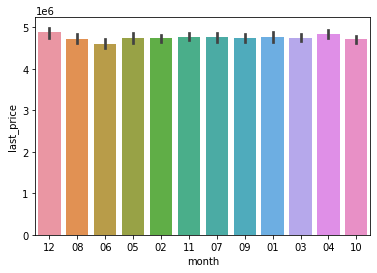

In [709]:
seaborn.barplot(data=data, x="month", y="last_price")

**Месяц в году тоже не сильно влияет на цену.**

<AxesSubplot:xlabel='year', ylabel='last_price'>

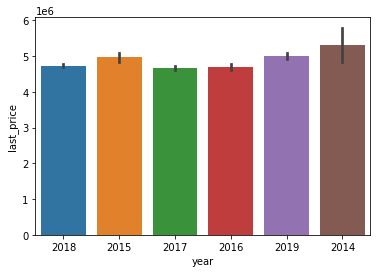

In [710]:
seaborn.barplot(data=data, x="year", y="last_price")

**Тут максимальная цена указана в 2014-2015 году, это может быть связано с кризисом в стране, но дальше цена идет только вверх, жилье постепенно дорожает.**

**Для второстепенных параметров, на цену большее влияние оказало этаж в доме и год продажи.**

**Теперь я хочу найти ТОП 10 районов по числу объявлений.**

In [711]:
top=data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)

In [712]:
top 

locality_name
Санкт-Петербург      11353
поселок Мурино         368
поселок Шушары         356
Всеволожск             327
Колпино                314
Пушкин                 287
Гатчина                276
поселок Парголово      238
деревня Кудрово        207
Выборг                 183
Name: locality_name, dtype: int64

**Создадим список из этих населенных пунктов.**

In [713]:
areas=top.index.unique()

**Оставим в таблице только те строки, в которых указаны локации из самых популярных населенных пунктов.**

In [714]:
data_top=data.query('locality_name in @areas')

In [715]:
data_top

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m,weekday,month,year,floor_cat,cityCenters_nearest_km
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,<NA>,...,NaN,0.0,NaN,81.0,180107.526882,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,<NA>,...,90.0,2.0,574.0,558.0,151486.880466,3,08,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,<NA>,...,112.0,1.0,48.0,121.0,312500.000000,1,06,2018,другой,8.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,<NA>,...,NaN,NaN,NaN,189.0,187945.560596,2,05,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,<NA>,...,NaN,0.0,NaN,289.0,123853.211009,6,02,2017,другой,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15.0,63.00,12,<NA>,...,NaN,0.0,NaN,23.0,146031.746032,0,04,2019,другой,14.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.30,4,<NA>,...,353.0,2.0,652.0,29.0,217791.411043,2,02,2018,другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.00,2,<NA>,...,300.0,0.0,NaN,15.0,177419.354839,3,07,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.30,7,<NA>,...,NaN,1.0,806.0,519.0,234987.593052,3,10,2016,другой,4.0


**Посчитаем, сколько стоит в среднем 1 квадратный метр в кождой локации.**

In [716]:
data_top.groupby('locality_name')['price_for_m'].mean().sort_values()

locality_name
Выборг                98778.632091
Гатчина              122253.850714
Всеволожск           128136.629977
Колпино              130194.313436
поселок Шушары       149017.010531
поселок Мурино       172245.755550
Пушкин               183181.478242
поселок Парголово    186906.331677
деревня Кудрово      189786.241696
Санкт-Петербург      190492.839975
Name: price_for_m, dtype: float64

<AxesSubplot:xlabel='locality_name'>

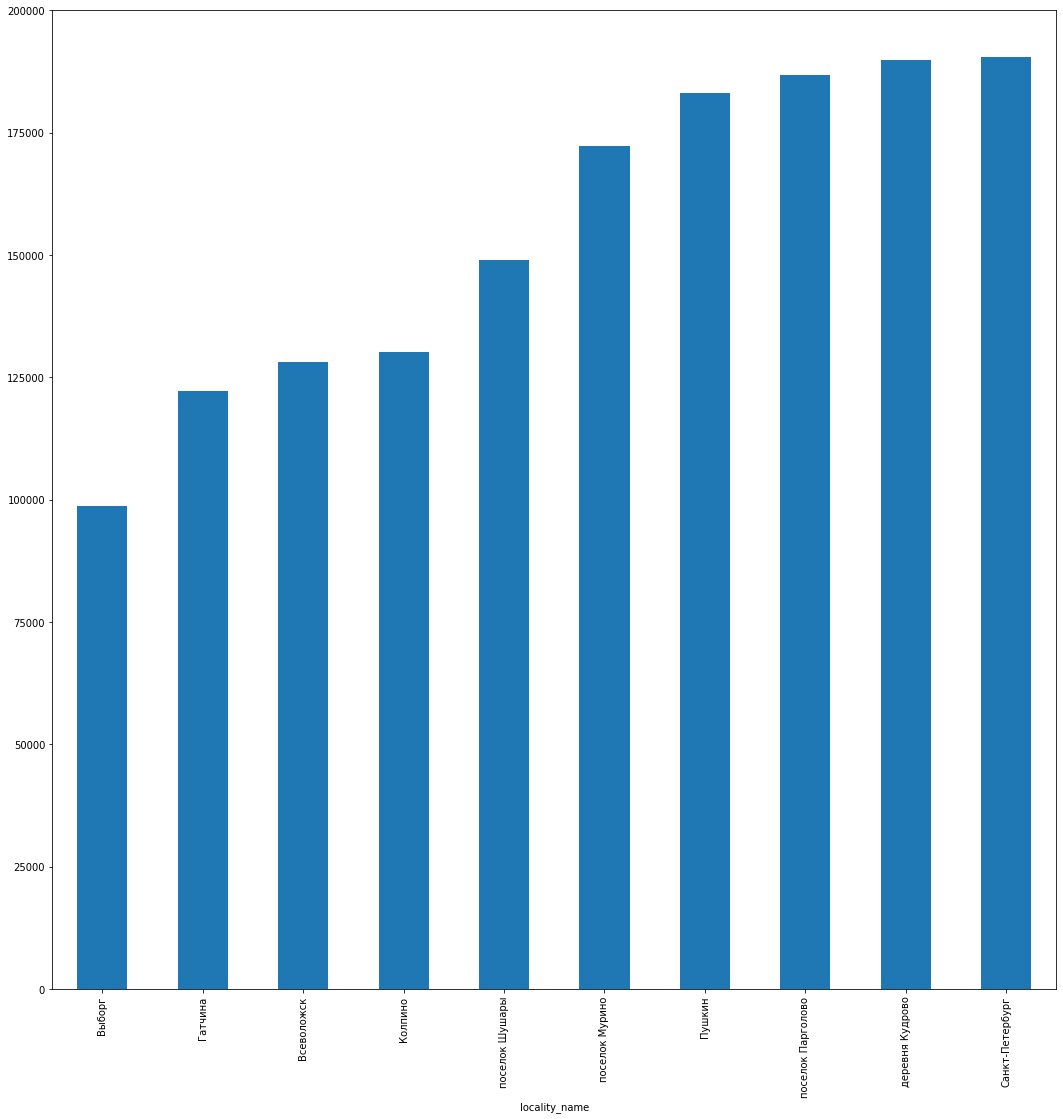

In [717]:
data_top.groupby('locality_name')['price_for_m'].mean().sort_values().plot.bar(figsize=(18,18))

**Оказалось, самая дорогая площадь в Ленинградской области находится в Санкт-Петербурге, а самая дешевая в Выборге, где цена за м^2 более чем в 2 раза дешевле.**

**Последний этап заключается в том, как разница в расстоянии от центра города выражена в стоимости квадратных метров.**

In [718]:
distance=data.groupby('cityCenters_nearest_km')['price_for_m'].mean().sort_values(ascending=False)

In [719]:
distance

cityCenters_nearest_km
43.0    248464.438398
5.0     222635.576799
6.0     214185.441784
59.0    212500.000000
54.0    211247.297725
8.0     205560.734968
55.0    204878.048780
7.0     202233.579882
4.0     200629.922301
0.0     194345.677238
1.0     194108.897161
13.0    193197.611889
19.0    193096.327585
12.0    192667.873164
15.0    189623.748834
14.0    188884.704424
9.0     188395.276903
10.0    188043.427734
2.0     188023.817754
11.0    186222.925312
3.0     186219.491539
25.0    183620.023254
16.0    183155.658452
20.0    181961.975018
18.0    177756.436214
35.0    174684.762723
17.0    174388.008952
57.0    172285.714286
22.0    171296.584747
23.0    168618.194532
26.0    167591.297797
21.0    163626.693066
27.0    162158.635557
34.0    162084.352609
48.0    161730.844438
41.0    158220.656941
33.0    151915.039859
30.0    151482.635650
53.0    150454.575906
24.0    147086.491510
47.0    144369.106284
36.0    143442.104013
28.0    143321.619616
31.0    142170.812945
49.0    1

<AxesSubplot:xlabel='cityCenters_nearest_km'>

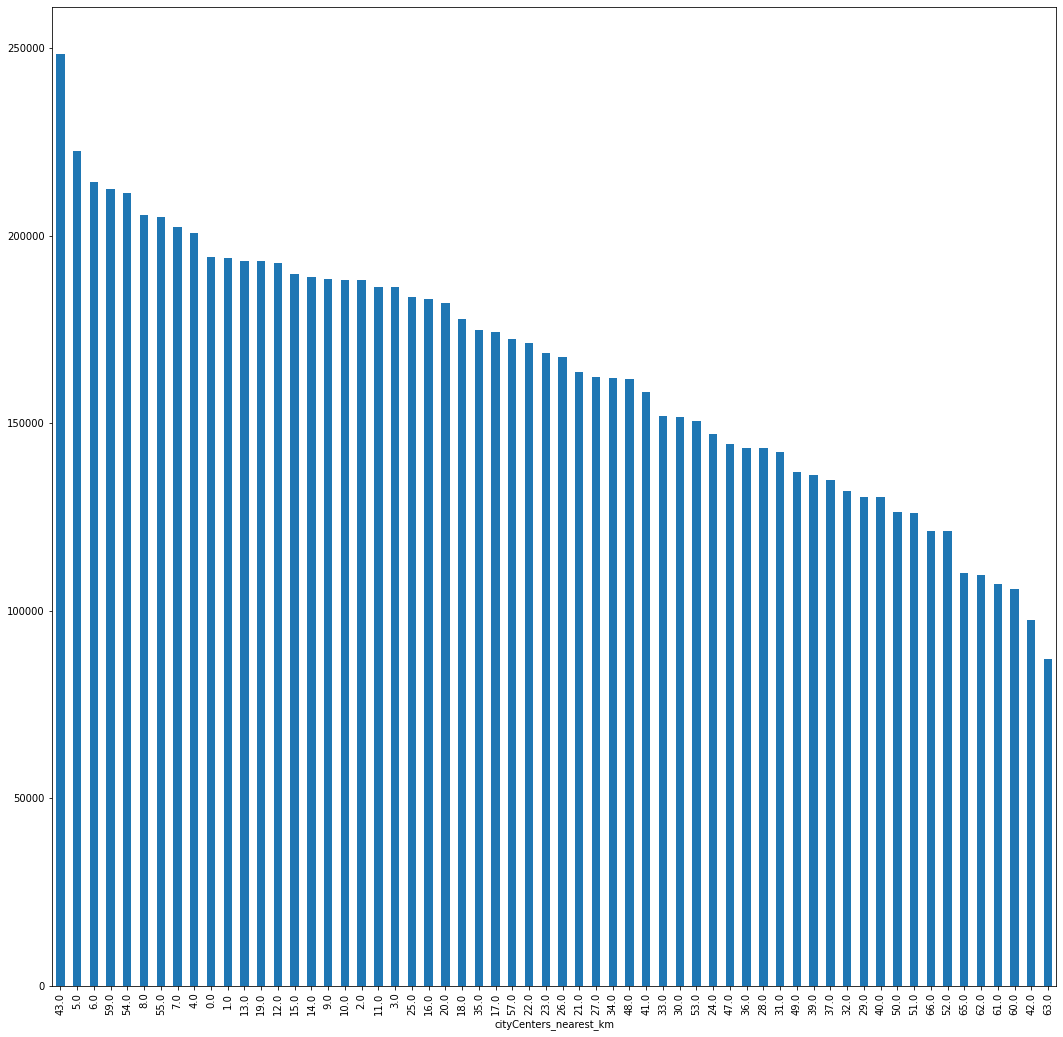

In [720]:
distance.plot.bar(figsize=(18,18))

**Все ожидаемо, чем ближе к центру, тем дороже. Есть некоторые исключения, но это жилье скорее всего находится на элитных участках(Например, рублевка) и там ценообразование строится на других критериях, а общая тенденция в целом видна.**

### Общий вывод

**Сегодня мы просмотрели данные о базе жилья в Ленинградской области, для определения, по каким факторам можно определять рыночную стоимость объектов недвижимости.** 


Сегодня мы получили таблицу о недвижимости Санкт-Петербурга для анализа факторов, влиящих на стоимость.

Сначала была выполнена предобработка данных:работа с пропусками, аномальными значениями, а также добавление новых столбцов для дальнейшего анализа.

Далее мы разбили данные на первостепенные и второстепенные, влиящие на цену объекта. К второстепенным относились те данные, которые нелинейно влияли на стоимость квартиры(тип этажа, месяц продажи и др.)


В этой работе мы находили интересные особенности и зависимости, которые существуют на рынке недвижимости, и нам удалось установить:

1. Мы выяснили, что к быстрым продажам относятся те, которые были проведены в первые месяцы, к долгим мы отнесли те, которые длились более полугода. Среднее время продажи 93 дня.


2. Были выявлены важнейшие критерии для определения стоимости жилья: площадь квартиры и ее удаленность от центра прямопропорционально влияют на стоимость площади в объектах.

3. Также мы убедились в ликвидности недвижимости в этой области, так как число сделок с каждым годом только растет


Значит, ключевые показатели объектов, на которые нужно обращать внимание для определения стоимости недвижимости в Ленинградсокй области:

1. Удаленность от центра города;
2. Площадь объекта;
3. Этаж в доме;
4. Год объявления.